<a href="https://colab.research.google.com/github/PaulToronto/Applied-Geospatial-Data-Science-with-Python---Book/blob/main/2_4_Contextily_providers_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextily `providers` Objects

## Imports

In [1]:
!pip install contextily

In [2]:
import contextily as cx
import xyzservices.providers as xyz

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

drive_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Science/Applied Geospatial Data Science with Python - Book/data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# we are using the extent around Mexico for the examples
extent = (-12600000, -10300000, 1800000, 3800000)

## Chooosing a web tile provider

- the default is the OpenStreetMap Humanitarian background

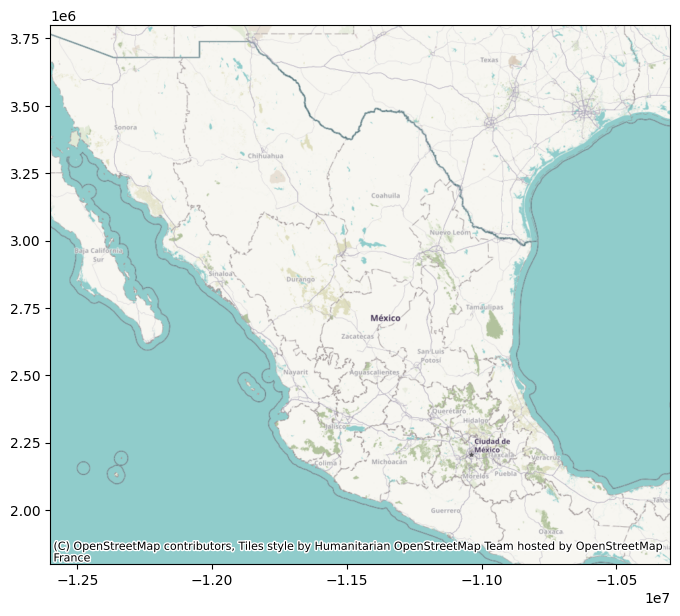

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis(extent)
cx.add_basemap(ax)

- Use the `source` argument to specify a different provider

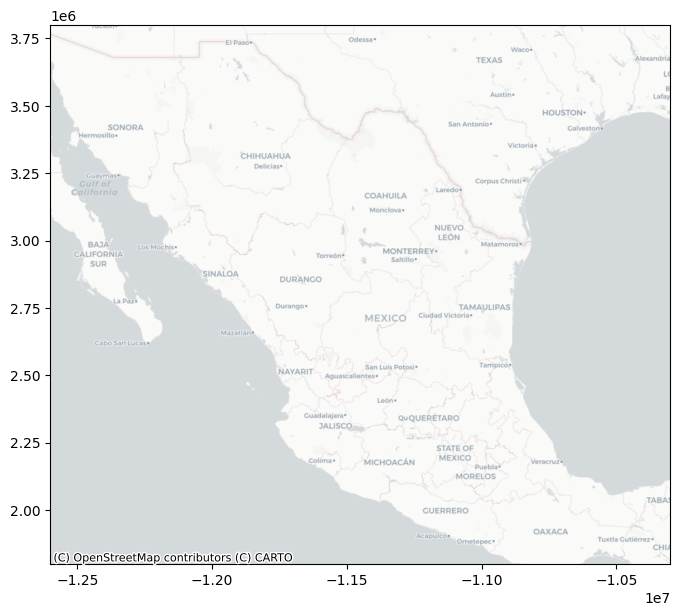

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis(extent)
cx.add_basemap(ax,
               source=cx.providers.CartoDB.Positron)

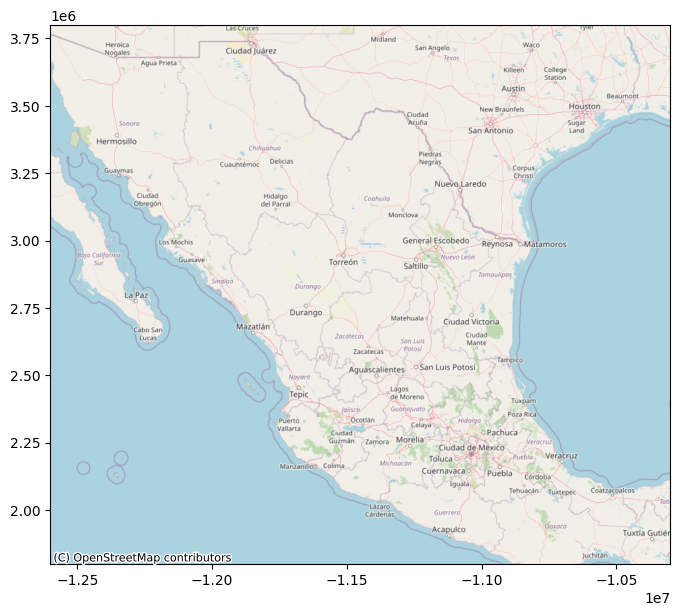

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis(extent)
cx.add_basemap(ax,
               source=cx.providers.OpenStreetMap.Mapnik)

- You can also get the tiles directly from xyzservices
- cx.providers does this under the hood

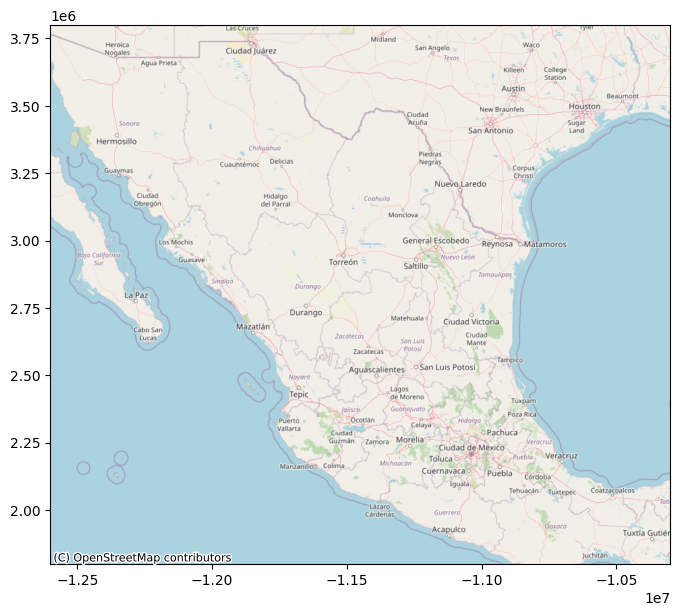

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis(extent)
cx.add_basemap(ax,
               source=xyz.OpenStreetMap.Mapnik)

## What is the `provider` object?

In [9]:
type(cx.providers)

xyzservices.lib.Bunch

In [10]:
# the TileProvider object behaves like a dict
type(cx.providers.OpenStreetMap.Mapnik)

xyzservices.lib.TileProvider

In [11]:
# we can explore its contents
cx.providers.OpenStreetMap.Mapnik

{'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
 'max_zoom': 19,
 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
 'attribution': '(C) OpenStreetMap contributors',
 'name': 'OpenStreetMap.Mapnik'}

In [12]:
cx.providers.OpenStreetMap.Mapnik['url']

'https://tile.openstreetmap.org/{z}/{x}/{y}.png'

## Specifying options for a provider

- some providers require additional information, such as an API access key

In [13]:
# OpenWeatherMap requires an API key
cx.providers.OpenWeatherMap.Clouds

{'url': 'http://{s}.tile.openweathermap.org/map/{variant}/{z}/{x}/{y}.png?appid={apiKey}',
 'max_zoom': 19,
 'html_attribution': 'Map data &copy; <a href="http://openweathermap.org">OpenWeatherMap</a>',
 'attribution': 'Map data (C) OpenWeatherMap',
 'apiKey': '<insert your api key here>',
 'opacity': 0.5,
 'variant': 'clouds',
 'name': 'OpenWeatherMap.Clouds'}

In [14]:
# call it by supplying apiKey
cx.providers.OpenWeatherMap.Clouds(apiKey='my-private-api-key')

{'url': 'http://{s}.tile.openweathermap.org/map/{variant}/{z}/{x}/{y}.png?appid={apiKey}',
 'max_zoom': 19,
 'html_attribution': 'Map data &copy; <a href="http://openweathermap.org">OpenWeatherMap</a>',
 'attribution': 'Map data (C) OpenWeatherMap',
 'apiKey': 'my-private-api-key',
 'opacity': 0.5,
 'variant': 'clouds',
 'name': 'OpenWeatherMap.Clouds'}

In [15]:
# this can be specified wherever `source` is expected

#cx.add_basemap(ax, source=cx.providers.OpenWeatherMap.Clouds(apiKey='my-private-api-key'))

## Manually specifying a provider

- Since the provider definition is nothing more than an url with the `{z}/{x}/{y}` format, you can also specify such an url manually, in case the provider of our choice is not available in `contextily` (the provider is expected to faoll the standard XYX protocol

In [16]:
cx.providers.OpenStreetMap.HOT

{'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
 'max_zoom': 19,
 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
 'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
 'name': 'OpenStreetMap.HOT'}

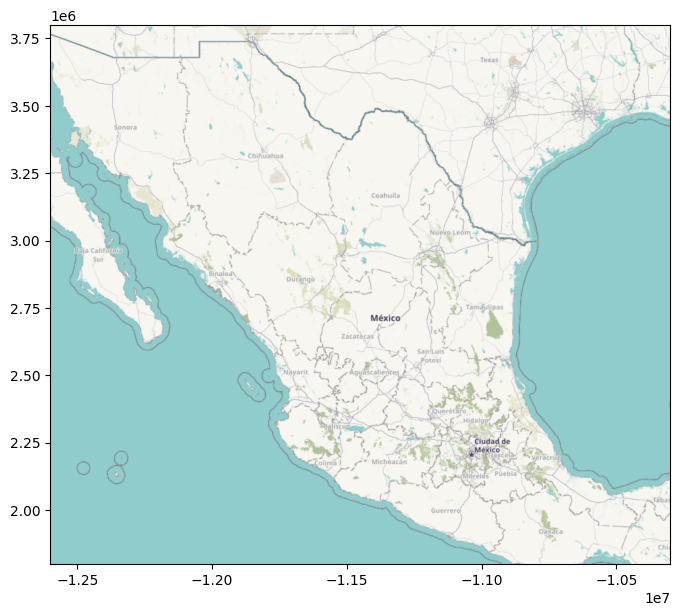

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis(extent)
cx.add_basemap(ax, source='https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png')

## Overview of built-in providers

In [18]:
providers = cx.providers.flatten()

In [19]:
len(providers)

790

In [20]:
# let's choose a small number of them
selection = ['OpenStreetMap.Mapnik',
             'OpenStreetMap.HOT',
             'OpenTopoMap',
             'CartoDB.Positron',
             'CartoDB.Voyager',
             'CartoDB.DarkMatter',
             'NASAGIBS.ASTER_GDEM_Greyscale_Shaded_Relief',
             'NASAGIBS.ViirsEarthAtNight2012'
            ]
len(selection)

8

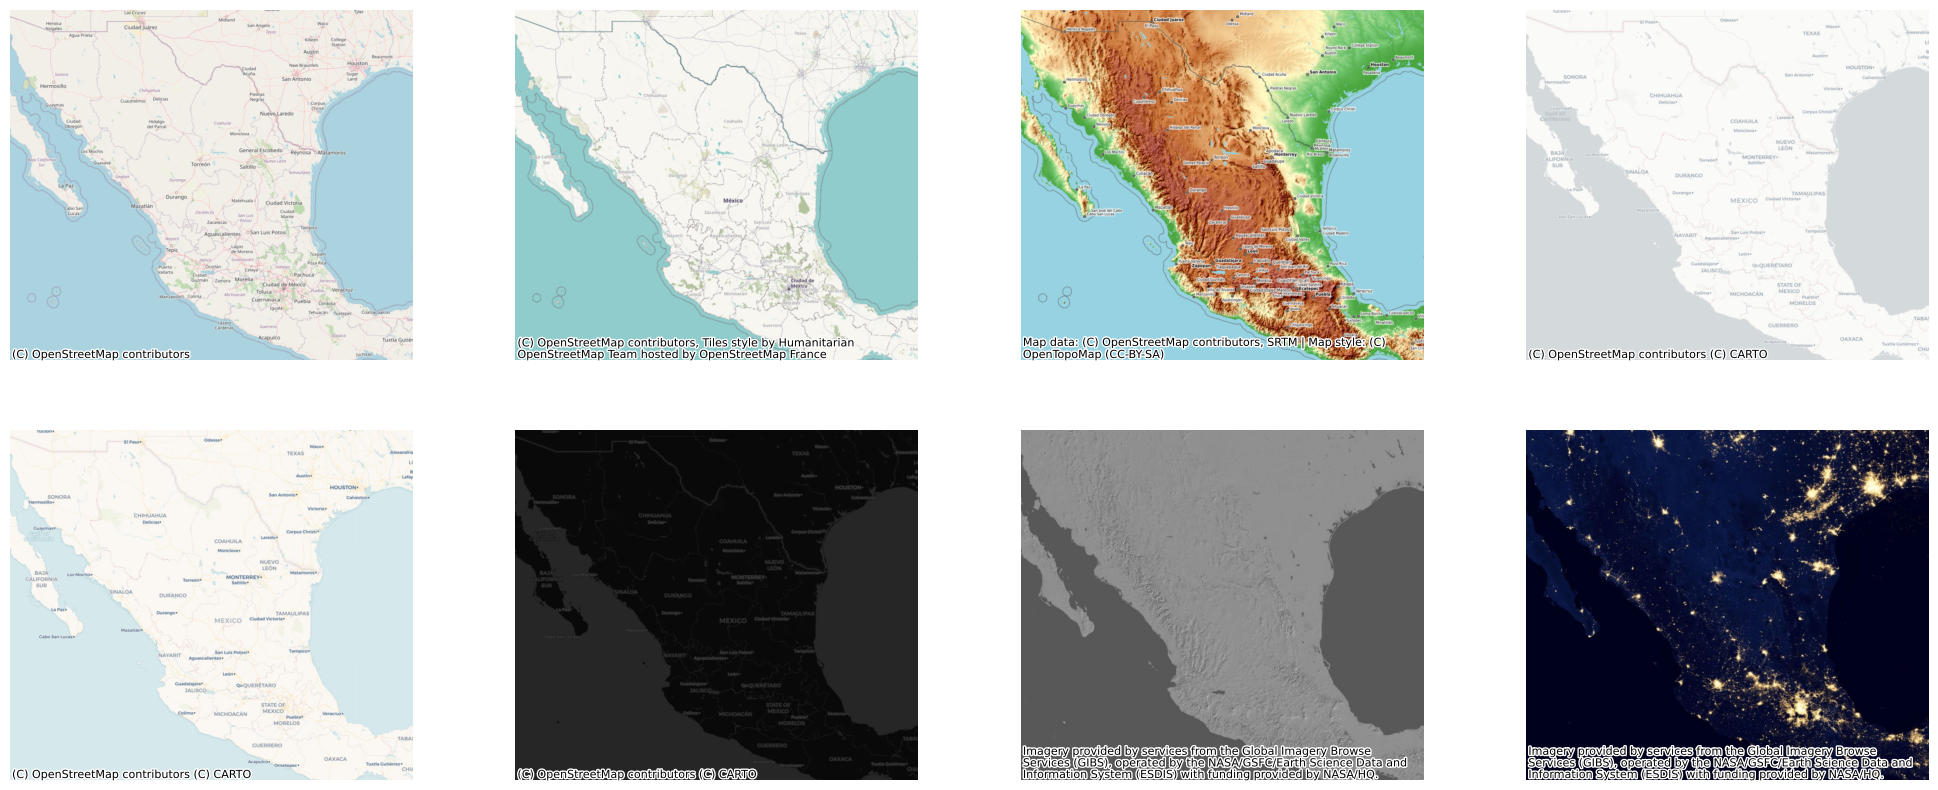

<Figure size 640x480 with 0 Axes>

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(25, 10))

axs = axs.flatten()
for name, ax in zip(selection, axs):
    ax.axis(extent)
    cx.add_basemap(ax, source=providers[name])
    ax.set_axis_off()

plt.show()
plt.savefig(drive_path + 'tiles.png', bbox_inches='tight')